# cosine similarity 計算單字相似度

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
text = [
    ["the", "dog", "run", ],
    ["a", "cat", "run", ],
    ["a", "dog", "sleep", ],
    ["the", "cat", "sleep", ],
    ["a", "dog", "bark", ],
    ["the", "cat", "meows", ],
    ["the", "bird", "fly", ],
    ["a", "bird", "sleep", ],
]

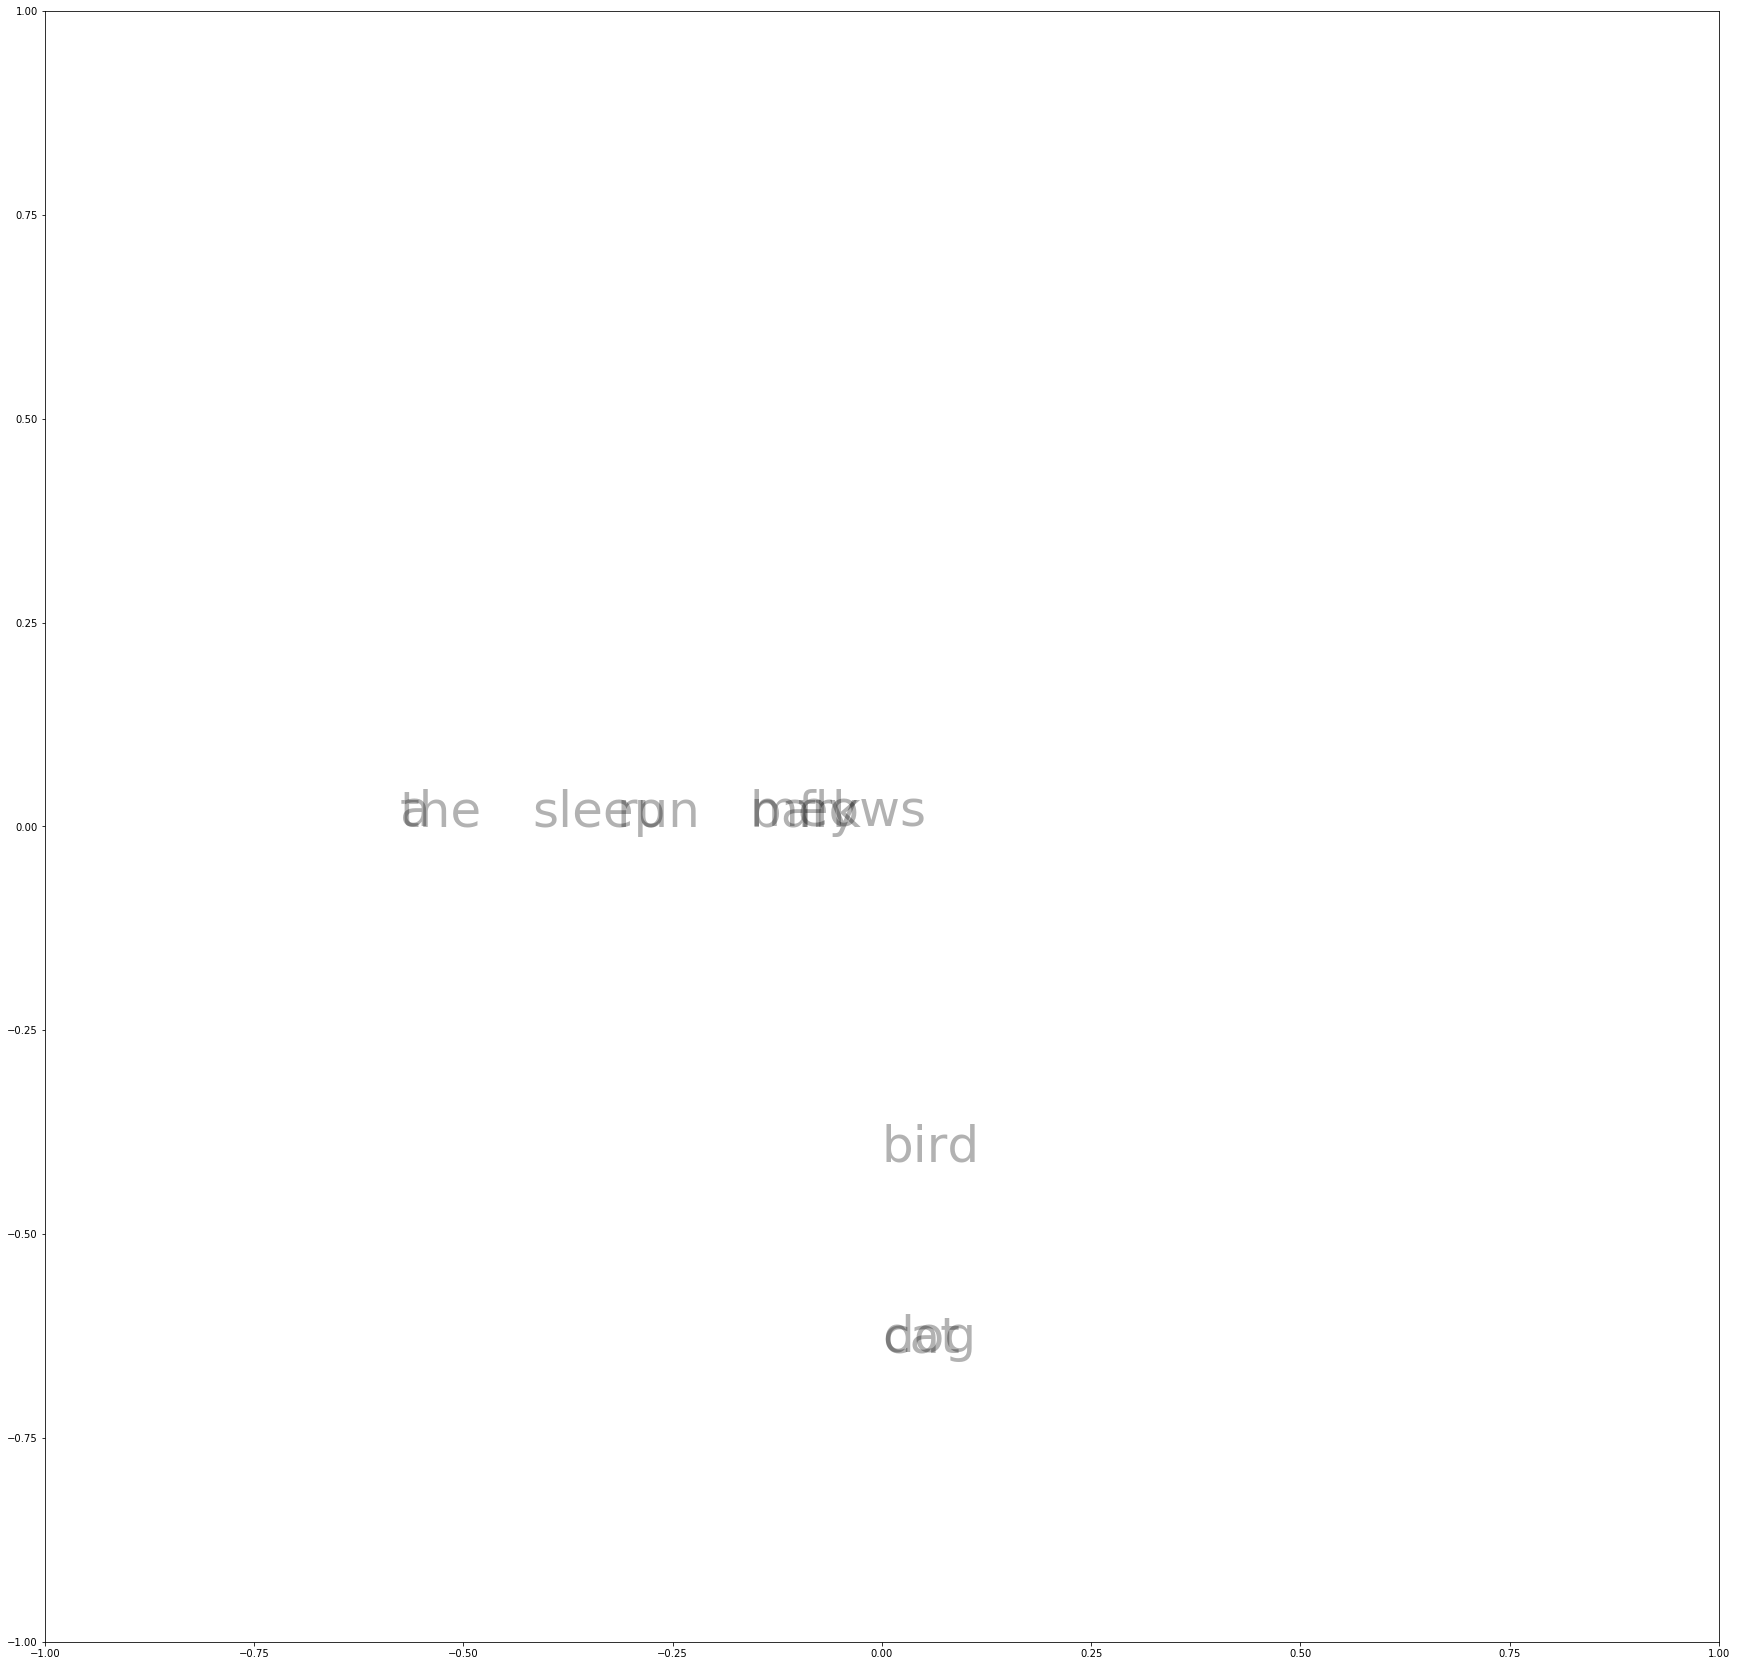

In [52]:
"""
    產生:
    wordsVector = 單字出現次數向量
    wordsIndex  = 單字對應位置矩陣
    indexWords  = 位置對應單字矩陣 
"""
def buildWord2Vec(text):
    textSet = sorted(list(set(reduce(lambda a,b: a+b, text))))
    wordsIndex = {w: i for i,w in enumerate(textSet)}
    indexWords = {x[1]: x[0] for x in wordIndex.items()}
    wordsVector = np.zeros((len(wordsIndex), len(wordsIndex)))
    for words in text:
         for word1, word2 in zip(words[:-1], words[1:]):
                indexWord1, indexWord2 = wordsIndex[word1], wordsIndex[word2]
                wordsVector[indexWord1][indexWord2] += 1
                wordsVector[indexWord2][indexWord1] += 1
    return wordsVector, wordsIndex, indexWords

"""
    計算向量距離
"""
def vecAbs(vec):
    return np.sqrt(np.sum(np.power(vec, 2)))

def cosineSimilarity(vec1, vec2):
    return np.dot(vec1, vec2) / (vecAbs(vec1) * vecAbs(vec2))

def visualize(wordsVector, indexWords):
    fig = plt.figure(figsize=(30,30))
    U, sigma, V = np.linalg.svd(wordsVector)
    ax = fig.add_subplot(111)
    ax.axis([-1, 1, -1, 1])
    for i in indexWords:
        ax.text(U[i, 0], U[i, 1], indexWords[i], alpha=0.3, fontsize=50)
    plt.show()
    
wordsVector, wordsIndex, indexWords = buildWord2Vec(text)
visualize(wordsVector, indexWords)